Nama : M Yusril Fauzan H

NIM  : 1103204015

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Load your regression dataset
dataset_path = '/content/Heart Attack.csv'
df = pd.read_csv(dataset_path)

In [5]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [6]:
df = df.drop('gender', axis=1)

In [19]:
df = df.drop('class', axis=1)

In [20]:
df

,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,66,160,83,160.0,1.80,0.012
1,21,94,98,46,296.0,6.75,1.060
2,55,64,160,77,270.0,1.99,0.003
3,64,70,120,55,270.0,13.87,0.122
4,55,64,112,65,300.0,1.08,0.003
...,...,...,...,...,...,...,...
1314,44,94,122,67,204.0,1.63,0.006
1315,66,84,125,55,149.0,1.33,0.172
1316,45,85,168,104,96.0,1.24,4.250
1317,54,58,117,68,443.0,5.80,0.359


In [21]:
X = df.drop('age', axis=1)
y = df['glucose']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)  # Output layer for regression (1 neuron)
])

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
history_reg = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
27/27 [==============================] - 2s 11ms/step - loss: 26042.0469 - val_loss: 30145.2012
Epoch 2/10
27/27 [==============================] - 0s 4ms/step - loss: 24778.2676 - val_loss: 27994.7598
Epoch 3/10
27/27 [==============================] - 0s 4ms/step - loss: 21985.9805 - val_loss: 23529.4766
Epoch 4/10
27/27 [==============================] - 0s 5ms/step - loss: 17022.4355 - val_loss: 16570.0898
Epoch 5/10
27/27 [==============================] - 0s 4ms/step - loss: 10551.4609 - val_loss: 8917.8271
Epoch 6/10
27/27 [==============================] - 0s 4ms/step - loss: 5415.7256 - val_loss: 3800.0808
Epoch 7/10
27/27 [==============================] - 0s 4ms/step - loss: 2863.1731 - val_loss: 1837.1343
Epoch 8/10
27/27 [==============================] - 0s 4ms/step - loss: 1993.7523 - val_loss: 1193.4159
Epoch 9/10
27/27 [==============================] - 0s 6ms/step - loss: 1431.1471 - val_loss: 936.9083
Epoch 10/10
27/27 [==============================] - 0s

In [27]:
test_loss_reg = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss (MSE) for Regression: {test_loss_reg:.4f}')

Test Loss (MSE) for Regression: 928.8854


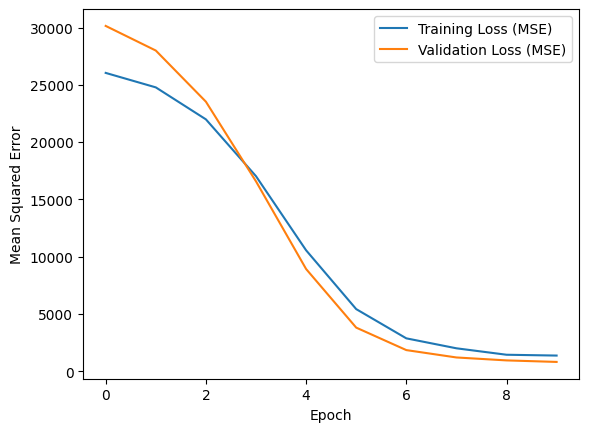

In [28]:
plt.plot(history_reg.history['loss'], label='Training Loss (MSE)')
plt.plot(history_reg.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()